# Reproduction of Article
1. Steps:
    1. Import Data
    1. Initial Data Exploration
        1. Data Summary Table
    1. Comparison with article Data

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import codecs
root_path_report="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\03_relatorio\\springer\\tables\\"
root_path_data="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\01_dados\\01_raw\\"
root_path_analysis="C:\\Users\\Debora\\Documents\\01_UFU_local\\01_comp_evolutiva\\05_trabalho3\\01_dados\\02_analysis\\01_implementation\\"

## Parse Data

In [2]:
# # Export table to txt for latex
# root_path_report = "C:\\Users\\debor\\Documents\\01_UFU_local\\01_comp_evolutiva\\01_trabalho_1\\03_relatorio\\template-latex\\tables\\"
# file_name = "representacao.txt"
# path = root_path_report + file_name
# with codecs.open(path, 'w', 'utf-8') as outfile:
#     outfile.write(tabela_df.to_latex(index=False))

# Open pickle Exec
file_name='v_0_exec.pkl'
# file_name='step_v_0step_exec.pkl'
path=root_path_data+file_name
infile = open(path,'rb')
ds_exec= pickle.load(infile)
infile.close()

# Open pickle dict class object pop
file_name='v_0_id.pkl'
# file_name='step_v_0_id.pkl'
path=root_path_data+file_name
infile = open(path,'rb')
ds_ind= pickle.load(infile)
infile.close()

# Unpack Data Execution
headers=["Execution","Variant","Hipervolume","Pareto Front"]
df_exec=pd.DataFrame(ds_exec,columns=headers)

# Unpack Data per Ind
headers=["Execution","Variation","Solution","Total throughput [kg]", "Max total backlog [kg]", "Mean total backlog [kg]","std dev total backlog [kg]", "Median total backlog [kg]","Min total backlog [kg]", "P(total backlog ≤ 0 kg)","Max total inventory deficit [kg]", "Mean total inventory deficit [kg]","std dev inventory deficit [kg]", "Median total inventory deficit [kg]", "Min total inventory deficit [kg]","Total Deficit [kg]","Batches [un]","Product label","Start of USP [date]","End of DSP [date]"]

df_ind=pd.DataFrame(ds_ind,columns=headers)
df_ind

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_mon...",X,555.1,59.624545,51.448371,3.675727,51.270194,42.578911,5144.837076,600.258730,544.479692,18.349822,538.934509,513.782529,538.934509,"[30, 20, 35, 3, 30]","[3, 2, 0, 1, 3]","[2016-12-01, 2017-08-24, 2018-02-25, 2018-12-1...","[2017-08-24, 2018-02-25, 2018-12-12, 2019-02-1..."
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_mon...",Y,664.4,173.103326,160.542772,4.240579,160.138411,150.386980,16054.277250,975.238612,950.897649,8.460427,950.950597,929.944914,950.950597,"[31, 36, 31, 30]","[3, 2, 3, 2]","[2016-12-01, 2017-08-31, 2018-06-24, 2019-03-17]","[2017-08-31, 2018-06-24, 2019-03-17, 2019-11-27]"


In [3]:
df_ind

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_mon...",X,555.1,59.624545,51.448371,3.675727,51.270194,42.578911,5144.837076,600.258730,544.479692,18.349822,538.934509,513.782529,538.934509,"[30, 20, 35, 3, 30]","[3, 2, 0, 1, 3]","[2016-12-01, 2017-08-24, 2018-02-25, 2018-12-1...","[2017-08-24, 2018-02-25, 2018-12-12, 2019-02-1..."
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_mon...",Y,664.4,173.103326,160.542772,4.240579,160.138411,150.386980,16054.277250,975.238612,950.897649,8.460427,950.950597,929.944914,950.950597,"[31, 36, 31, 30]","[3, 2, 3, 2]","[2016-12-01, 2017-08-31, 2018-06-24, 2019-03-17]","[2017-08-31, 2018-06-24, 2019-03-17, 2019-11-27]"


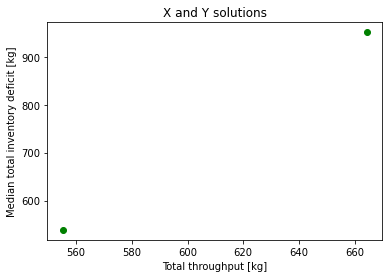

In [4]:
import matplotlib.pyplot as plt
x=np.array(df_ind['Total throughput [kg]'])
y=np.array(df_ind['Median total inventory deficit [kg]'])
plt.scatter(x,y,c="g",label="Pareto Front")
plt.title('X and Y solutions')
plt.xlabel('Total throughput [kg]')
plt.ylabel('Median total inventory deficit [kg]')
plt.show()

In [5]:
# Import from csv
file_name='df_ind_base.csv'
path=root_path_data+file_name
df_ind_base=pd.read_csv(path)
df_ind_base

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,Article,Article,X,539.3,8.2,0.2,0.6,0,0,0.82,683.4,432.6,58.6,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,Article,Article,Y,601.5,16.0,7.1,4.3,0,0,0.50,786.0,558.6,59.0,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN


In [6]:
import datetime
date=datetime.datetime.now()

df_ind_w=pd.concat([df_ind_base,df_ind])
path=root_path_analysis+str(date.day)+"-"+str(date.month)+str(date.hour)+".csv"
df_ind_w.to_csv(path)
df_ind_w

,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.000000,0.000000,0.820000,683.400000,432.600000,58.600000,424.400000,259.400000,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.000000,0.000000,0.500000,786.000000,558.600000,59.000000,551.700000,355.600000,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_mon...",X,555.1,59.624545,51.448371,3.675727,51.270194,42.578911,5144.837076,600.258730,544.479692,18.349822,538.934509,513.782529,538.934509,"[30, 20, 35, 3, 30]","[3, 2, 0, 1, 3]","[2016-12-01, 2017-08-24, 2018-02-25, 2018-12-1...","[2017-08-24, 2018-02-25, 2018-12-12, 2019-02-1..."
1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_mon...",Y,664.4,173.103326,160.542772,4.240579,160.138411,150.386980,16054.277250,975.238612,950.897649,8.460427,950.950597,929.944914,950.950597,"[31, 36, 31, 30]","[3, 2, 3, 2]","[2016-12-01, 2017-08-31, 2018-06-24, 2019-03-17]","[2017-08-31, 2018-06-24, 2019-03-17, 2019-11-27]"


# Discuss Data

- Main 8/1
    - Calculated demand with Monte Carlo
    - 10 Executions
    - No solution without violations, passing all in front 0
    - Total time  17632.4670568 Per execution 1763.24670568

In [7]:
# Import from csv
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 130)
pd.set_option('display.width', 2000)
result=pd.read_csv(root_path_analysis+'8-1.csv')
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlometrics_front0_w_vio,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",X,630.1,10.435893,1.059073,2.617906,0.0,0.0,152.506570,34.1,6.420617,10.388137,0.0,0.0,0.0,[31 28 31 31],[3 2 3 2],['2016-12-01' '2017-09-11' '2018-05-30' '2019-03-10'],['2017-08-24' '2018-05-10' '2019-02-20' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlometrics_front0_w_vio,100,1000,2,0.5,(0.04, 0.61, 0.77, 0.47)",Y,660.5,12.347932,1.445241,3.050971,0.0,0.0,208.114675,38.5,8.729108,12.264356,0.0,0.0,0.0,[50 31 50],[2 3 2],['2016-12-01' '2018-01-20' '2018-10-31'],['2017-12-31' '2018-10-13' '2019-11-30']


- Attributes that seem wrong
    - P(total backlog ≤ 0 kg)	
        - My value is high, what makes sense, since I am producing large number of batches and not procuding all products.
            - This indicates I need to review my fitness, why is it focusing on product 2,3 and large batches?
                1. Modify my backlog, to consider the median
    - Max total inventory deficit [kg]	
    - Mean total inventory deficit [kg]	
    - Median total inventory deficit [kg]	
    - Min total inventory deficit [kg]	
    - Total Deficit [kg]	
    - Batches [un]
        - Large values of batches, however still only producing products 2 and 3.

- Main 14/1 14h
    - New scheduling considering articles pseudo code 
    - Monte Carlo simulations=100
    - 2 Executions, with 1000 generations
    - No solution without violations, passing all in front 0
    - Total time  877 Per execution 438

In [8]:
result=pd.read_csv(root_path_analysis+'14-114.csv')# Import from csv
result

,Unnamed: 0,Execution,Variation,Solution,Total throughput [kg],Max total backlog [kg],Mean total backlog [kg],std dev total backlog [kg],Median total backlog [kg],Min total backlog [kg],P(total backlog ≤ 0 kg),Max total inventory deficit [kg],Mean total inventory deficit [kg],std dev inventory deficit [kg],Median total inventory deficit [kg],Min total inventory deficit [kg],Total Deficit [kg],Batches [un],Product label,Start of USP [date],End of DSP [date]
0,0,Article,Article,X,539.3,8.200000,0.200000,0.600000,0.0,0.0,0.820000,683.4,432.600000,58.600000,424.4,259.4,NaN,[15 10 29 3 15 11 15 6 2 2 2 10],[3 2 0 1 3 2 1 3 2 1 2 3],NaN,NaN
1,1,Article,Article,Y,601.5,16.000000,7.100000,4.300000,0.0,0.0,0.500000,786.0,558.600000,59.000000,551.7,355.6,NaN,[12 13 24 18 5 19 9 30],[3 2 0 3 1 0 2 3],NaN,NaN
2,0,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",X,663.8,10.402717,1.085342,2.622689,0.0,0.0,156.289225,34.1,6.568086,10.348981,0.0,0.0,0.0,[31 36 30 31],[3 2 3 2],['1970-01-01' '2017-08-31' '2018-06-24' '2019-03-10'],['2017-08-31' '2018-06-24' '2019-03-10' '2019-11-27']
3,1,0,"front_nsga,tour_vio,rein_vio,vio_back,calc_montecarlo,100,1000,2,0.11,(0.04, 0.61, 0.77, 0.47)",Y,663.8,10.402717,1.085342,2.622689,0.0,0.0,156.289225,34.1,6.568086,10.348981,0.0,0.0,0.0,[31 36 30 31],[3 2 3 2],['1970-01-01' '2017-08-31' '2018-06-24' '2019-03-10'],['2017-08-31' '2018-06-24' '2019-03-10' '2019-11-27']


- Start time of first batch is wrong, however just fixed

- Attributes that seem wrong
    - P(total backlog ≤ 0 kg)	
        - My value is high, what makes sense, since I am producing large number of batches and not procuding all products.
            - This indicates I need to review my fitness, why is it focusing on product 2,3 and large batches?
                1. Modify my backlog, to consider the median
    - Max total inventory deficit [kg]	
    - Mean total inventory deficit [kg]	
    - Median total inventory deficit [kg]	
    - Min total inventory deficit [kg]	
    - Total Deficit [kg]	
    - Batches [un]
        - More reasonable values of batches, however still only producing products 2 and 3. 